# Hand Classification Training

In [1]:
# This is only demo, training data is not included in the repo for leagal purposes

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt

In [3]:
import sys
# Add the project root directory to the Python path
sys.path.append('../')

from src.utils.config import MODEL_DIR, DATA_DIR

img_width, img_height = 224, 224
  
train_data_dir = DATA_DIR / 'hand_classification' / 'train'
validation_data_dir = DATA_DIR / 'hand_classification' / 'validate'
nb_train_samples = 4000 
nb_validation_samples = 400
epochs = 10
batch_size = 16

In [4]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [5]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid'))

In [6]:
model.compile(loss ='binary_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 
  

In [7]:
train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 

In [8]:
test_datagen = ImageDataGenerator(rescale = 1. / 255) 

In [9]:
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='binary',shuffle=True) 
  
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='binary',shuffle=True) 

Found 4189 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator, 
    steps_per_epoch = nb_train_samples // batch_size, 
    epochs = 20, validation_data = validation_generator, 
    validation_steps = nb_validation_samples // batch_size) 

Epoch 1/20
250/250 [==============================] - 119s 361ms/step - loss: 0.7691 - accuracy: 0.5699 - val_loss: 0.3574 - val_accuracy: 0.8575
Epoch 2/20
250/250 [==============================] - 90s 359ms/step - loss: 0.4592 - accuracy: 0.7880 - val_loss: 0.1886 - val_accuracy: 0.9275
Epoch 3/20
250/250 [==============================] - 86s 342ms/step - loss: 0.3352 - accuracy: 0.8635 - val_loss: 0.1477 - val_accuracy: 0.9425
Epoch 4/20
250/250 [==============================] - 93s 372ms/step - loss: 0.2694 - accuracy: 0.8827 - val_loss: 0.1186 - val_accuracy: 0.9600
Epoch 5/20
250/250 [==============================] - 77s 308ms/step - loss: 0.2444 - accuracy: 0.9015 - val_loss: 0.0889 - val_accuracy: 0.9750
Epoch 6/20
250/250 [==============================] - 77s 309ms/step - loss: 0.2145 - accuracy: 0.9178 - val_loss: 0.1271 - val_accuracy: 0.9600
Epoch 7/20
250/250 [==============================] - 88s 354ms/step - loss: 0.1900 - accuracy: 0.9220 - val_loss: 0.1056 - val_a

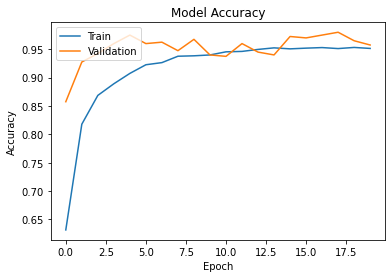

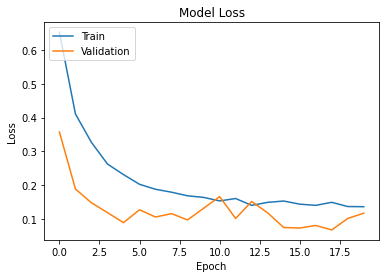

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Optionally, plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
model.save(MODEL_DIR / 'hand_classification.h5')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 32)      416       
_________________________________________________________________
activation (Activation)      (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_1 (Activation)    (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 64)        8